In [1]:
#import Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Day           6435 non-null   int32         
 11  Week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 509.1 KB


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,9


In [11]:
# columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# for col in columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#     print(f"Outliers in {col}: {outliers.shape[0]}")

In [12]:
Q1=df['Weekly_Sales'].quantile(0.25)
Q3=df['Weekly_Sales'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Weekly_Sales']>=Q1-1.5*IQR) &(df['Weekly_Sales']<=Q3+1.5*IQR)]

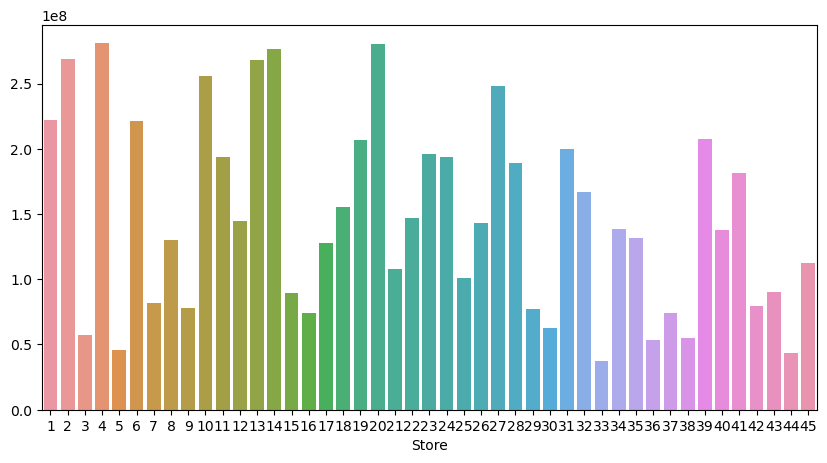

In [13]:
# Total Weekly_Sales for each store

a=df.groupby(['Store',])['Weekly_Sales'].sum()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y=a.values, x=a.index)
plt.show()

In [14]:
a=pd.DataFrame(a)

**Store with maxium Sales**

In [15]:
max_sales_store = a.sort_values('Weekly_Sales', ascending=False)[0:1].reset_index()
max_sales_store

,Store,Weekly_Sales
0,4,2.810352e+08


In [16]:
max_sales_store_formatted = max_sales_store['Weekly_Sales'].apply(lambda x:f'{x:,.2f}')
max_sales_store_formatted

0    281,035,224.92
Name: Weekly_Sales, dtype: object

**Top 5 best performing stores**

In [17]:
best_sales_store = a.sort_values('Weekly_Sales', ascending=False)[0:5].reset_index()
best_sales_store

,Store,Weekly_Sales
0,4,2.810352e+08
1,20,2.800237e+08
2,14,2.761276e+08
3,2,2.687221e+08
4,13,2.682025e+08


In [18]:
best_sales_store_formatted = best_sales_store['Weekly_Sales'].apply(lambda x: f'{x:,.2f}')
best_sales_store_formatted

0    281,035,224.92
1    280,023,734.81
2    276,127,584.78
3    268,722,063.50
4    268,202,470.39
Name: Weekly_Sales, dtype: object

**Store with minimum Sales**

In [19]:
min_sales_store = a.sort_values('Weekly_Sales', ascending=True)[0:1].reset_index()
min_sales_store

,Store,Weekly_Sales
0,33,37160221.96


**Top 5 least performing Stores**

In [20]:
least_sales_stores = a.sort_values('Weekly_Sales', ascending=True)[0:5].reset_index()
least_sales_stores

,Store,Weekly_Sales
0,33,37160221.96
1,44,43293087.84
2,5,45475688.90
3,36,53412214.97
4,38,55159626.42


**difference between maxium sales and minimum sales**

In [21]:
diff_sales = max_sales_store['Weekly_Sales']-min_sales_store['Weekly_Sales']
diff_sales

0    2.438750e+08
Name: Weekly_Sales, dtype: float64

**TOP 5 days when sales was maxium**

In [22]:
df.groupby(['Date'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().head(5)

,Date,Weekly_Sales
0,2011-12-09,55561147.70
1,2011-11-25,54868300.43
2,2012-04-06,53502315.87
3,2011-12-23,53389269.84
4,2010-12-10,52914648.31


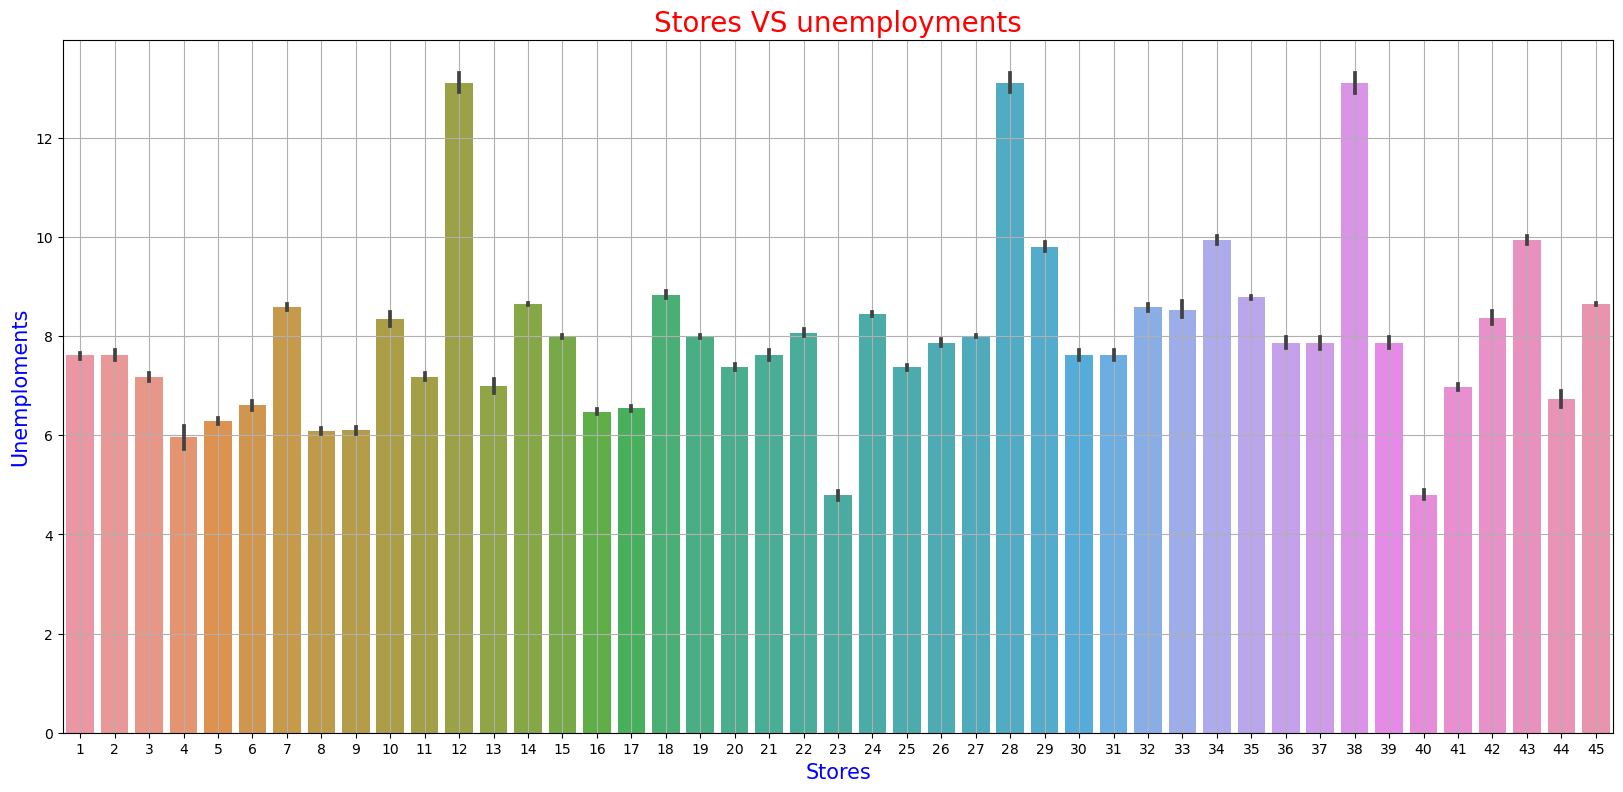

In [23]:
plt.figure(figsize = (20,9))
sns.barplot(x = df['Store'], y = df['Unemployment'])
plt.xlabel('Stores', fontsize = 15, color = 'blue')
plt.ylabel('Unemploments', fontsize = 15, color = 'blue')
plt.title('Stores VS unemployments', fontsize = 20, color = 'Red')
plt.grid()
plt.show()

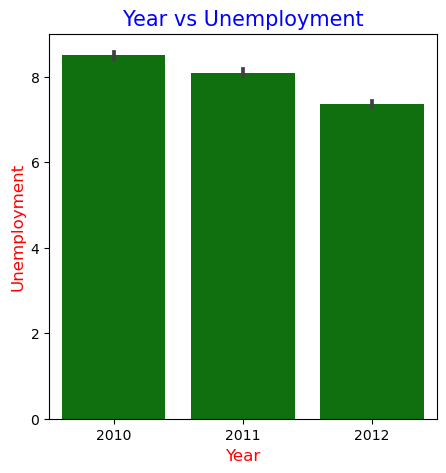

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x=df['Year'],y=df['Unemployment'],color='green')
plt.xlabel('Year',fontsize=12, color='r')
plt.ylabel('Unemployment',fontsize=12, color='r')
plt.title('Year vs Unemployment',fontsize=15,color='b')
plt.show()

**If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**
- Top 3 stores which are more affected due to unemployement : 38,44,4

In [25]:
# -0.1043, indicates a weak negative correlation between Weekly_Sales and Unemployment
df['Weekly_Sales'].corr(df['Unemployment'])

-0.10429750912578391

In [26]:
# Calculate the correlation between Weekly_Sales and Unemployment for each store 
# The .unstack() method reshapes this nested structure into a flat DataFrame, making it easier to read.
# Instead of having multiple levels of indexes, it transforms one of those levels into columns.

correlations = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().unstack()
correlations

Weekly_Sales              Unemployment             
      Weekly_Sales Unemployment Weekly_Sales Unemployment
Store                                                    
1              1.0    -0.097955    -0.097955          1.0
2              1.0     0.054288     0.054288          1.0
3              1.0    -0.230413    -0.230413          1.0
4              1.0    -0.639563    -0.639563          1.0
5              1.0    -0.207043    -0.207043          1.0
6              1.0     0.016833     0.016833          1.0
7              1.0    -0.165382    -0.165382          1.0
8              1.0    -0.052580    -0.052580          1.0
9              1.0    -0.191534    -0.191534          1.0
10             1.0     0.186979     0.186979          1.0
11             1.0    -0.020339    -0.020339          1.0
12             1.0    -0.009286    -0.009286          1.0
13             1.0    -0.400254    -0.400254          1.0
14             1.0     0.269510     0.269510          1.0
15             1.0     0.078905     0.078905          1.0
16             1.0    -0.070864    -0.070864          1.0
17             1.0    -0.263600    -0.263600          1.0
18             1.0     0.139179     0.139179          1.0
19             1.0     0.101464     0.101464          1.0
20             1.0    -0.109391    -0.109391          1.0
21             1.0     0.218367     0.218367          1.0
22             1.0     0.039043     0.039043          1.0
23             1.0    -0.125490    -0.125490          1.0
24             1.0    -0.012261    -0.012261          1.0
25             1.0    -0.004958    -0.004958          1.0
26             1.0    -0.066899    -0.066899          1.0
27             1.0    -0.002535    -0.002535          1.0
28             1.0     0.136671     0.136671          1.0
29             1.0     0.084682     0.084682          1.0
30             1.0     0.201862     0.201862          1.0
31             1.0    -0.064738    -0.064738          1.0
32             1.0    -0.099455    -0.099455          1.0
33             1.0     0.101175     0.101175          1.0
34             1.0     0.017010     0.017010          1.0
35             1.0     0.483865     0.483865          1.0
36             1.0     0.833734     0.833734          1.0
37             1.0    -0.221287    -0.221287          1.0
38             1.0    -0.785290    -0.785290          1.0
39             1.0    -0.384681    -0.384681          1.0
40             1.0    -0.112528    -0.112528          1.0
41             1.0    -0.350630    -0.350630          1.0
42             1.0    -0.356355    -0.356355          1.0
43             1.0    -0.201954    -0.201954          1.0
44             1.0    -0.780076    -0.780076          1.0
45             1.0    -0.004041    -0.004041          1.0

In [27]:
correlations['Unemployment']['Weekly_Sales'].sort_values(ascending=True)

Store
38   -0.785290
44   -0.780076
4    -0.639563
13   -0.400254
39   -0.384681
42   -0.356355
41   -0.350630
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
7    -0.165382
23   -0.125490
40   -0.112528
20   -0.109391
32   -0.099455
1    -0.097955
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
27   -0.002535
6     0.016833
34    0.017010
22    0.039043
2     0.054288
15    0.078905
29    0.084682
33    0.101175
19    0.101464
28    0.136671
18    0.139179
10    0.186979
30    0.201862
21    0.218367
14    0.269510
35    0.483865
36    0.833734
Name: Weekly_Sales, dtype: float64

****How is the Consumer Price index affecting the weekly sales of various stores?****

- Top 3 stores which are more affected due to unemployement : 36,14,35

In [28]:
corr = df.groupby(['Store'])[['Weekly_Sales', 'CPI']].corr().unstack()
corr

Weekly_Sales                    CPI     
      Weekly_Sales       CPI Weekly_Sales  CPI
Store                                         
1              1.0  0.225408     0.225408  1.0
2              1.0 -0.063786    -0.063786  1.0
3              1.0  0.317250     0.317250  1.0
4              1.0  0.675231     0.675231  1.0
5              1.0  0.308261     0.308261  1.0
6              1.0  0.033524     0.033524  1.0
7              1.0  0.289044     0.289044  1.0
8              1.0  0.120255     0.120255  1.0
9              1.0  0.294805     0.294805  1.0
10             1.0 -0.130205    -0.130205  1.0
11             1.0  0.069781     0.069781  1.0
12             1.0  0.084087     0.084087  1.0
13             1.0  0.401445     0.401445  1.0
14             1.0 -0.498495    -0.498495  1.0
15             1.0 -0.174467    -0.174467  1.0
16             1.0  0.124285     0.124285  1.0
17             1.0  0.348571     0.348571  1.0
18             1.0 -0.193541    -0.193541  1.0
19             1.0 -0.155341    -0.155341  1.0
20             1.0  0.203508     0.203508  1.0
21             1.0 -0.163649    -0.163649  1.0
22             1.0 -0.038602    -0.038602  1.0
23             1.0  0.137196     0.137196  1.0
24             1.0 -0.013684    -0.013684  1.0
25             1.0 -0.010914    -0.010914  1.0
26             1.0  0.131980     0.131980  1.0
27             1.0 -0.235769    -0.235769  1.0
28             1.0 -0.095908    -0.095908  1.0
29             1.0 -0.072530    -0.072530  1.0
30             1.0 -0.298188    -0.298188  1.0
31             1.0  0.132887     0.132887  1.0
32             1.0  0.196782     0.196782  1.0
33             1.0 -0.052271    -0.052271  1.0
34             1.0  0.115437     0.115437  1.0
35             1.0 -0.424107    -0.424107  1.0
36             1.0 -0.915095    -0.915095  1.0
37             1.0  0.244507     0.244507  1.0
38             1.0  0.812837     0.812837  1.0
39             1.0  0.428043     0.428043  1.0
40             1.0  0.113318     0.113318  1.0
41             1.0  0.392293     0.392293  1.0
42             1.0  0.360859     0.360859  1.0
43             1.0 -0.285686    -0.285686  1.0
44             1.0  0.740150     0.740150  1.0
45             1.0 -0.023548    -0.023548  1.0

In [29]:
corr['Weekly_Sales']['CPI'].sort_values(ascending=True)

Store
36   -0.915095
14   -0.498495
35   -0.424107
30   -0.298188
43   -0.285686
27   -0.235769
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.130205
28   -0.095908
29   -0.072530
2    -0.063786
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
25   -0.010914
6     0.033524
11    0.069781
12    0.084087
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
23    0.137196
32    0.196782
20    0.203508
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
42    0.360859
41    0.392293
13    0.401445
39    0.428043
4     0.675231
44    0.740150
38    0.812837
Name: CPI, dtype: float64

**temperature affect the weekly sales in any manner?**

In [30]:
# This value is close to 0, meaning that there is very little to no linear relationship between weekly sales and temperature. 
temp_corr = df[['Weekly_Sales', 'Temperature']].corr()
temp_corr

,Weekly_Sales,Temperature
Weekly_Sales,1.00000,-0.04434
Temperature,-0.04434,1.00000


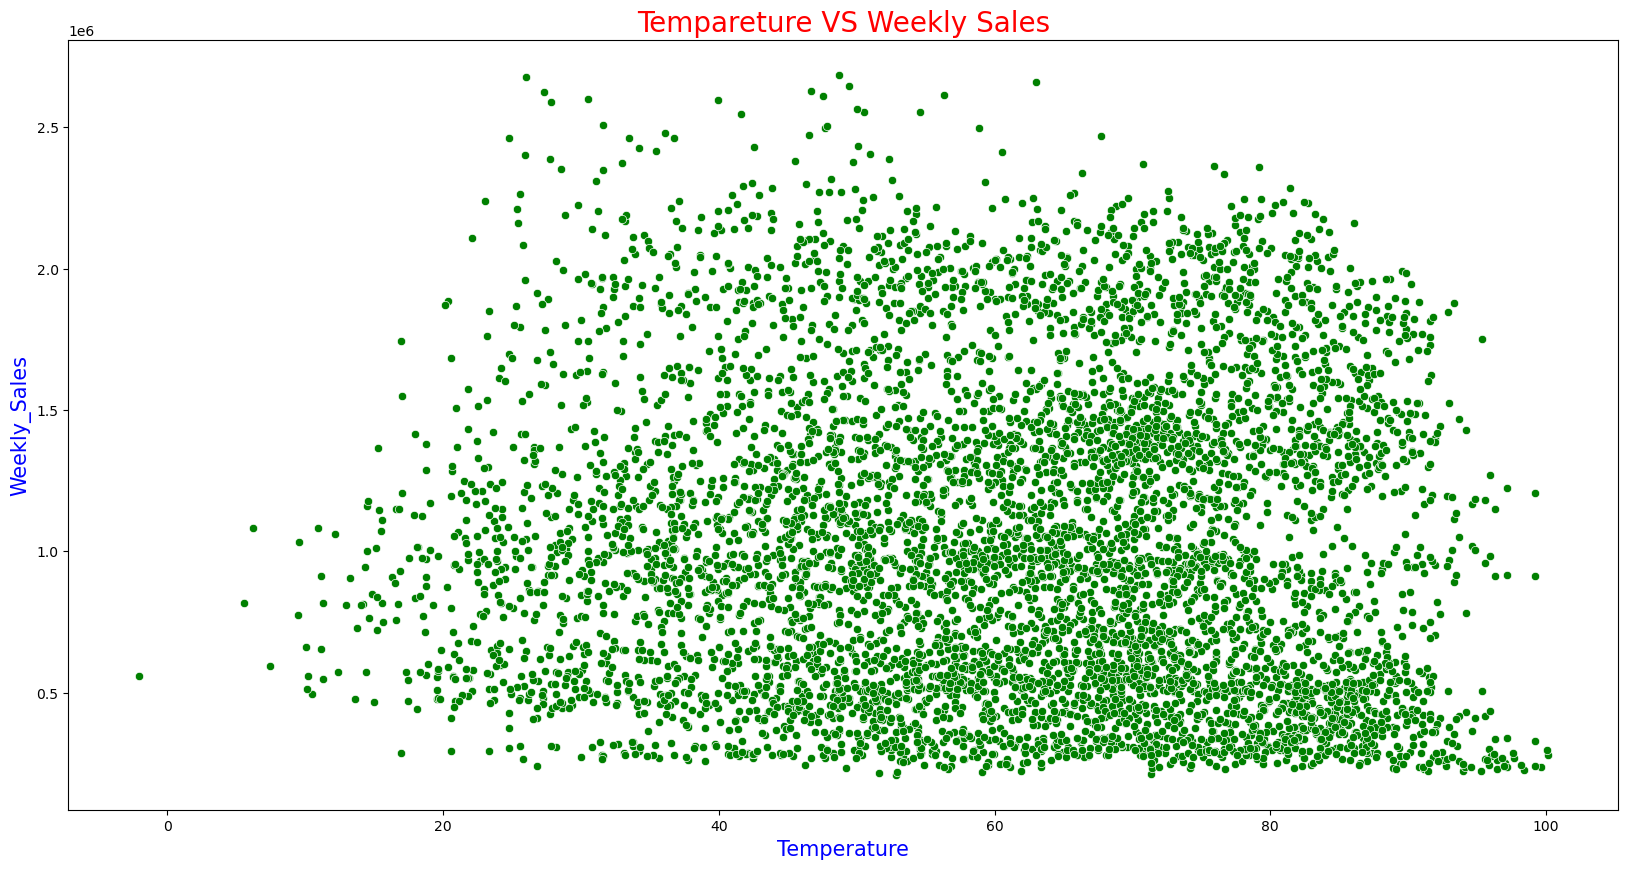

In [31]:
# Since both Weekly_Sales and Temperature are continuous variables used scatter plot.

plt.figure(figsize = (20,10))
sns.scatterplot(x=df['Temperature'], y = df['Weekly_Sales'], color = 'g')
plt.title('Tempareture VS Weekly Sales', color = 'r', fontsize = 20)
plt.xlabel('Temperature', color = 'b', fontsize = 15)
plt.ylabel('Weekly_Sales', color = 'b', fontsize = 15)
plt.show()

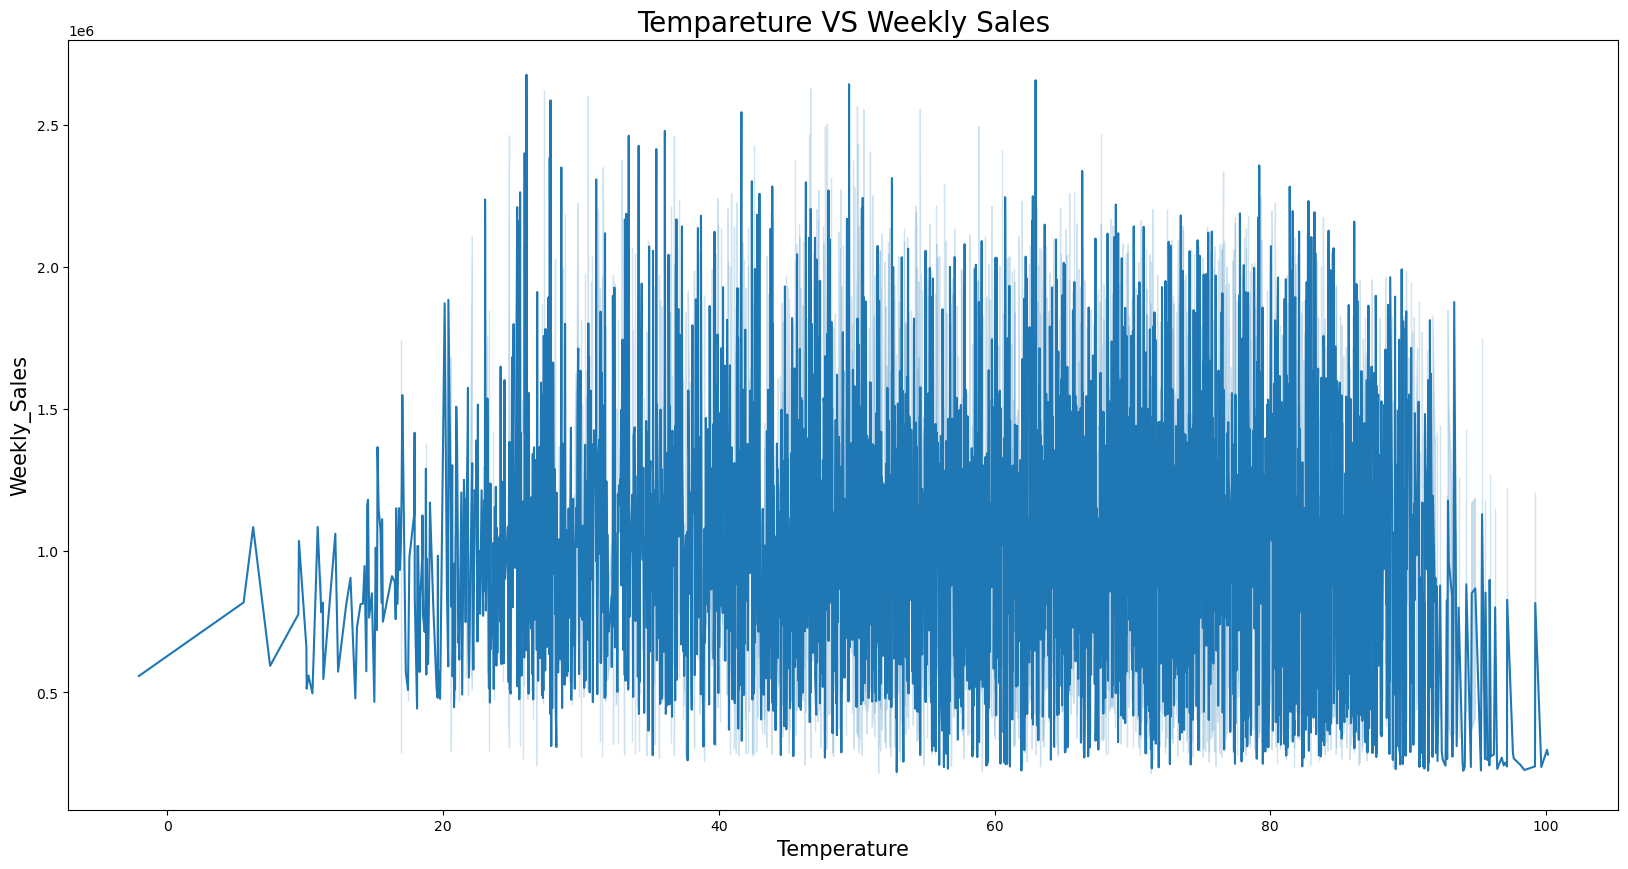

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(x=df['Temperature'], y = df['Weekly_Sales'])
plt.title('Tempareture VS Weekly Sales', fontsize = 20)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Weekly_Sales', fontsize = 15)
plt.show()

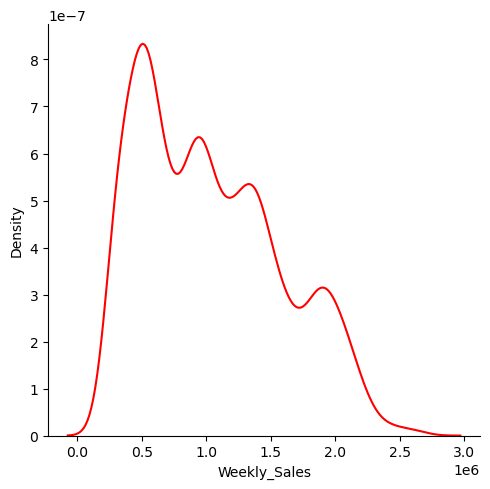

In [33]:
# The KDE plot will give an idea of the distribution of weekly sales, showing you where sales are concentrated.
# Peaks in the KDE curve indicate where the most frequent sales values occur.
# It can help identify if the sales data follows a normal distribution.
# If your data is skewed or has multiple peaks, the curve will reflect that distribution.

sns.displot(df['Weekly_Sales'], kind = 'kde', color = 'r')
plt.show()

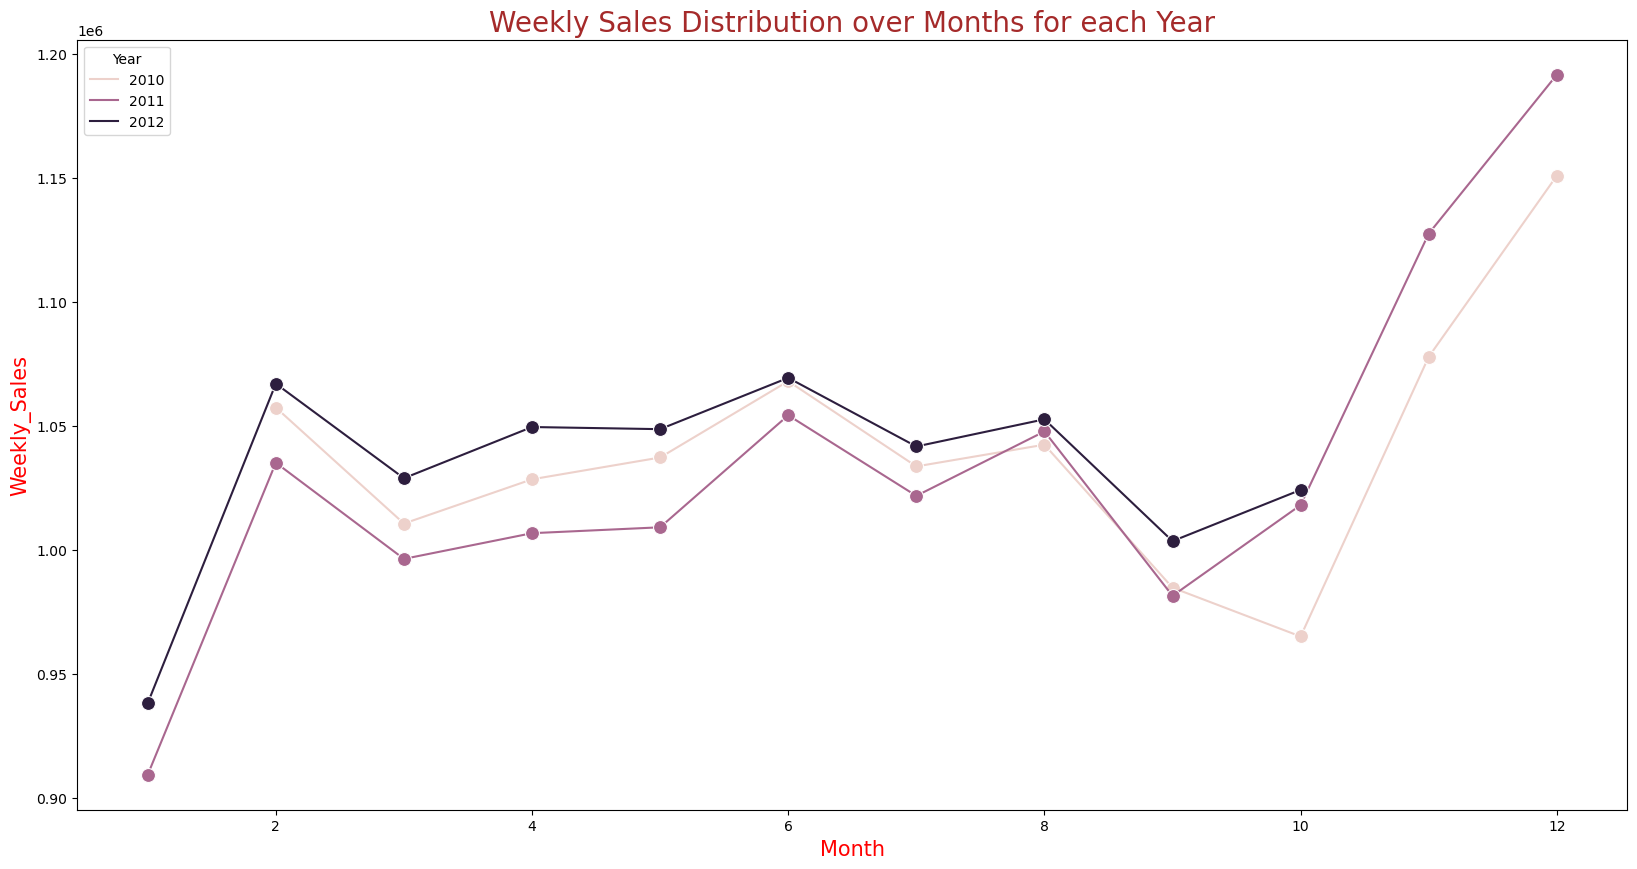

In [34]:
# visualize how weekly sales change over the months for different years.
#1. Spot any seasonal trends by observing how sales vary from month to month.
#2. Compare the performance of sales across different years.
#3. Identify peak months or periods when sales tend to increase or decrease.

plt.figure(figsize = (20,10))
sns.lineplot(x = df['Month'], y = df['Weekly_Sales'], hue = df['Year'], marker = 'o', markersize = 10,ci = None)
plt.title('Weekly Sales Distribution over Months for each Year', color = 'brown', fontsize = 20)
plt.xlabel('Month', color = 'r', fontsize = 15)
plt.ylabel('Weekly_Sales', color = 'r', fontsize = 15)
plt.show()

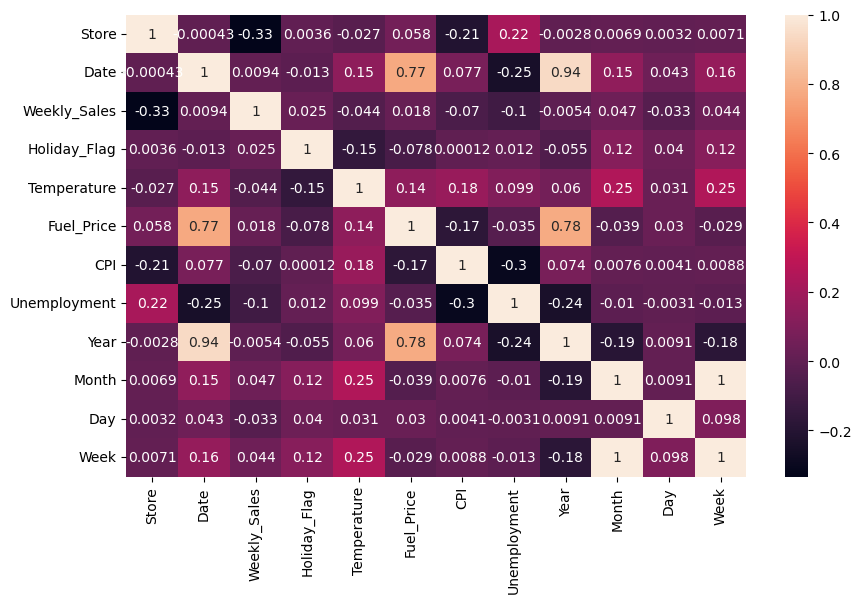

In [35]:
#Correlation values range from -1 to 1:
#1: Perfect positive correlation (as one variable increases, so does the other).
#-1: Perfect negative correlation (as one variable increases, the other decreases).
#0: No correlation.

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

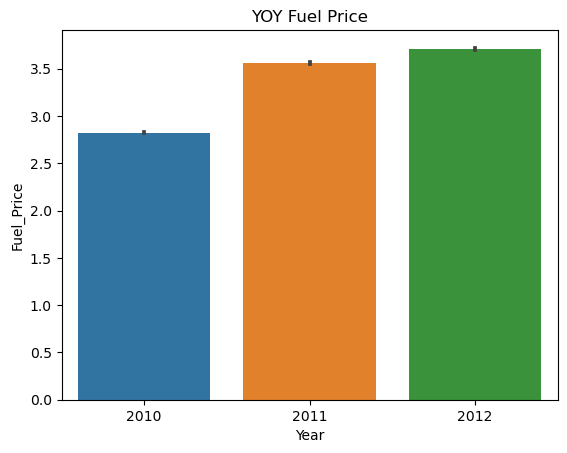

In [36]:
sns.barplot(x = df['Year'], y = df['Fuel_Price'])
plt.title('YOY Fuel Price')
plt.show()

# Model Selection & Forecasting

In [37]:
df=pd.read_csv('Walmart DataSet.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [38]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


**Forecast the sales for each store for the next 12 weeks**

In [40]:
store = int(input('Enter the store number for which to want forcast sales: '))

Enter the store number for which to want forcast sales: 1


In [41]:
sf = df[df['Store'] == store].loc[:,['Date','Weekly_Sales']]
sf

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


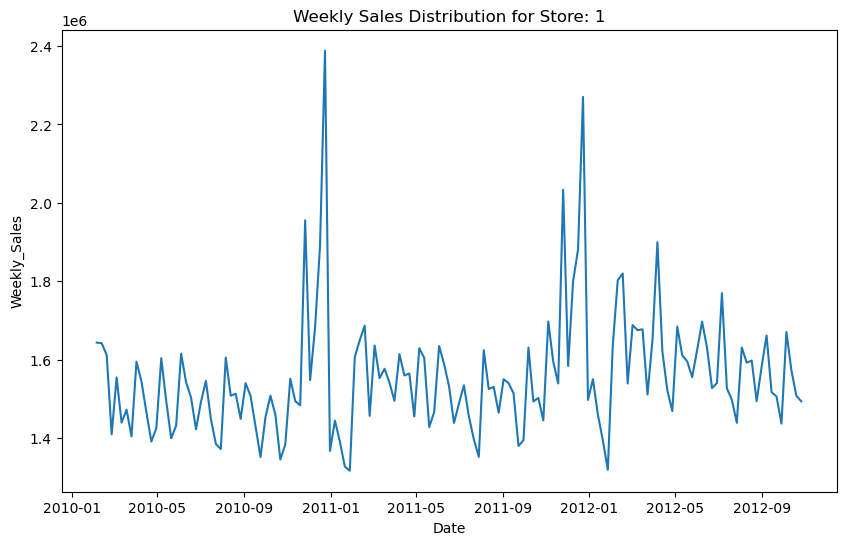

In [42]:
# This can help identify trends, seasonality, or any unusual spikes or drops in sales.

plt.figure(figsize = (10,6))
plt.plot(sf['Date'], sf['Weekly_Sales'])
plt.title(f'Weekly Sales Distribution for Store: {store}')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.show()

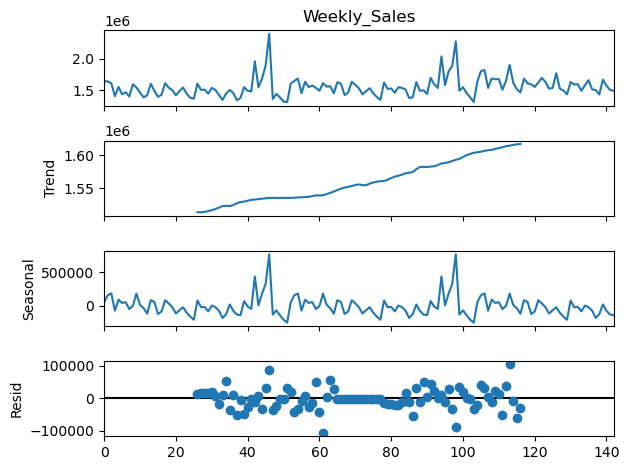

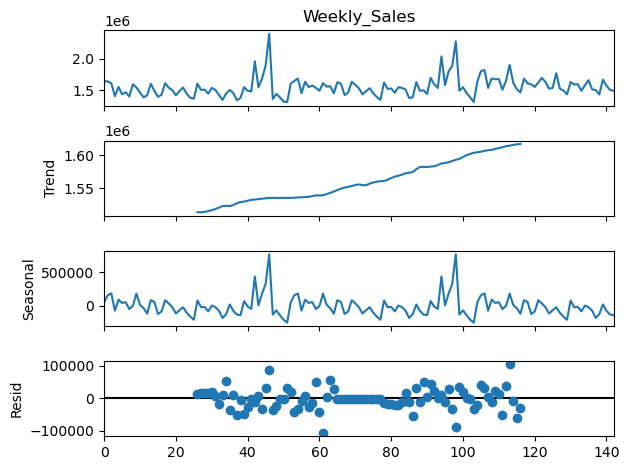

In [43]:
# break down the Weekly_Sales data into its underlying components (trend, seasonal, residuals), helping to better understand the patterns within the sales data
# Identifying any long-term trends (upward or downward),
# Spotting any seasonal patterns that repeat over time (e.g., higher sales in certain months),
# Evaluating the randomness in the data (residuals).

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(sf['Weekly_Sales'], period = 52)
decompose.plot()

In [44]:
# determine whether a given time series is stationary or non-stationary.
from statsmodels.tsa.stattools import adfuller

In [45]:
# The output of adfuller is stored in the result variable, which is a tuple with the following structure:
# result[0]: The test statistic, which indicates how strongly the data rejects or fails to reject the null hypothesis.
# result[1]: The p-value, which is used to determine the significance of the test.
# result[4]: The critical values for the test at different confidence levels (1%, 5%, and 10%).

In [46]:
result = adfuller(sf['Weekly_Sales'])
p_value = result[1]

if p_value < 0.05:
    print('The Time Series is Stationary')
else:
    print('The Time Series is Not Stationary')

The Time Series is Stationary


In [47]:
# For each point in the time series, it calculates the mean and standard deviation of the values from the last 7 weeks.
# mean(): This calculates the rolling mean (average) for the 7-week window.
#std(): This calculates the rolling standard deviation (a measure of how much the values are spread out) for the 7-week window.

mean_log = sf['Weekly_Sales'].rolling(window = 7).mean()
std_log = sf['Weekly_Sales'].rolling(window = 7).std()

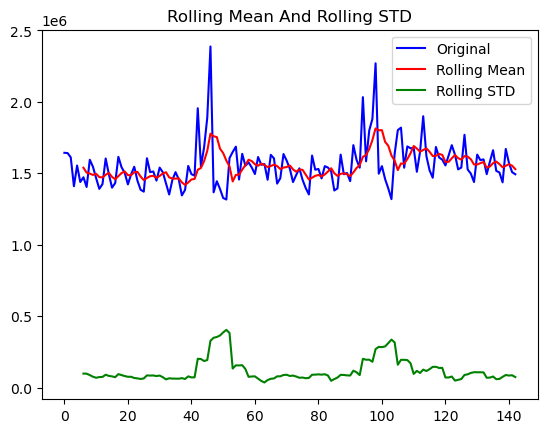

In [48]:
# analyze the stability and variability of the Weekly_Sales time series by plotting the rolling mean and rolling standard deviation (std) alongside the original data. 
# This helps to understand if the time series is stationary

plt.plot(sf['Weekly_Sales'], color = 'b', label = 'Original')
plt.plot(mean_log, color = 'r', label = 'Rolling Mean')
plt.plot(std_log, color = 'g', label = 'Rolling STD')
plt.legend()
plt.title('Rolling Mean And Rolling STD')
plt.show()

In [49]:
X = sf.iloc[:108]
y = sf.iloc[108:]

In [50]:
# The ARIMA model (AutoRegressive Integrated Moving Average)
# Its primary purpose is to model and predict time series data based on its own past values, trends, and noise (random variations).

from statsmodels.tsa.arima.model import ARIMA

In [51]:
# start=len(train): Predictions begin where the training data ends.
# end=len(train) + len(test) - 1: The predictions are made until the index that marks the end of the test set (test).
# dynamic=True: In dynamic forecasting, predictions for future time steps are based on previously predicted values rather than actual observed data after the start of the prediction range.

model = ARIMA(X['Weekly_Sales'], order = (2,0,2))
train_model = model.fit()

sf['predict'] = train_model.predict(start=len(X), end=len(X)+len(y)-1, dynamic = True)

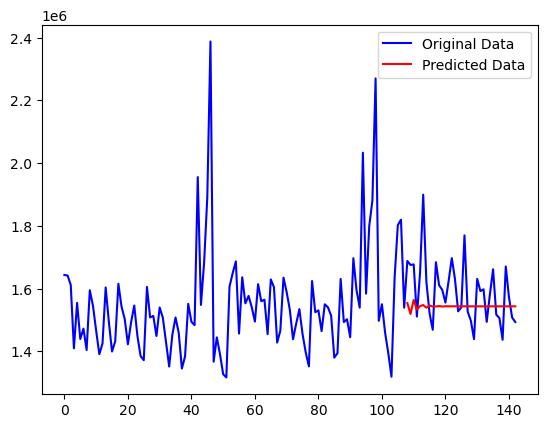

In [52]:
plt.plot(sf['Weekly_Sales'], color = 'b', label = 'Original Data')
plt.plot(sf['predict'], color = 'r', label = 'Predicted Data')
plt.legend()
plt.show()

In [53]:
# Setting date as an Index specially for SARIMAX 
sf.set_index('Date', inplace = True)

In [54]:
sf

,Weekly_Sales,predict
Date,,
2010-02-05,1643690.90,NaN
2010-02-12,1641957.44,NaN
2010-02-19,1611968.17,NaN
2010-02-26,1409727.59,NaN
2010-03-05,1554806.68,NaN
...,...,...
2012-09-28,1437059.26,1.543727e+06
2012-10-05,1670785.97,1.543727e+06
2012-10-12,1573072.81,1.543727e+06


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [56]:
# The non-seasonal ARIMA part (order=(2,0,2)) handles the general patterns and trends in the data.
# seasonal part (seasonal_order=(1,0,0,52)) captures the recurring patterns that happen every 52 weeks (one year).
# By combining both non-seasonal and seasonal components, the model is better suited for predicting future sales when the data contains trends and yearly cycles.

sarimax = SARIMAX(X['Weekly_Sales'], order = (2,0,2), seasonal_order = (1,0,0,52))
train_sarimax = sarimax.fit()

In [57]:
# Resetting index after SARIMAX model trained.
sf.reset_index(inplace = True)
sf

,Date,Weekly_Sales,predict
0,2010-02-05,1643690.90,NaN
1,2010-02-12,1641957.44,NaN
2,2010-02-19,1611968.17,NaN
3,2010-02-26,1409727.59,NaN
4,2010-03-05,1554806.68,NaN
...,...,...,...
138,2012-09-28,1437059.26,1.543727e+06
139,2012-10-05,1670785.97,1.543727e+06
140,2012-10-12,1573072.81,1.543727e+06
141,2012-10-19,1508068.77,1.543727e+06


In [58]:
sf['sarimax_predict'] = train_sarimax.predict(start=len(X), end=len(X)+len(y)-1, dynamic=True)

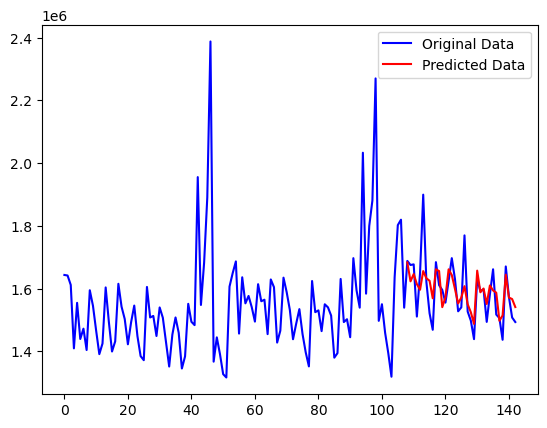

In [59]:
plt.plot(sf['Weekly_Sales'], color = 'b', label = 'Original Data')
plt.plot(sf['sarimax_predict'], color = 'r', label = 'Predicted Data')
plt.legend()
plt.show()

In [60]:
# red line (predictions) closely follows the blue line (actual values), it indicates that the model is performing well and accurately capturing the patterns in the data.
# capture the general seasonal trend (the periodic nature of the data), especially in the later parts of the series where the red and blue lines follow a similar pattern.
# However, it struggles to handle extreme fluctuations and irregular spikes in the data.
# SARIMAX model is not capturing the sudden spikes in sales, which could be due to special events, promotions, or seasonal effects that the model is not handling well.
# The prediction (red line) starts after around index 100, and for the most part, it stays within a narrow range. This indicates that the SARIMAX model has good predictive power for periods of consistent, steady sales but performs poorly when drastic changes occur.
# Since the predicted line is much smoother than the actual data, this suggests some level of underfitting, where the model isn't capturing all the variability in the data.

# Summary:
#The SARIMAX model captures the general trend and seasonal structure in the sales data reasonably well in stable periods, 
#but it struggles with predicting spikes and large fluctuations, 
#potentially indicating underfitting or a need for more complex modeling of special events or outliers in the data.

In [61]:
# Evaluating Using RMSE

from sklearn.metrics import mean_squared_error

In [62]:
# calculate the RMSE by comparing the predicted values from the SARIMAX model with the actual values in the test set.

RMSE2 = mean_squared_error(y['Weekly_Sales'], sf['sarimax_predict'].iloc[len(X):], squared = False)
print(f'RMSE for SARIMAX : {RMSE2}')

RMSE for SARIMAX : 69035.99509104741


In [63]:
sf.drop(['predict', 'sarimax_predict'], axis = 1, inplace = True)

In [64]:
sf.set_index('Date', inplace = True)

In [65]:
sf

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


# FORECASTING

In [66]:
# 36 steps of test data and 12 steps of next 12 weeks
forecast = train_sarimax.forecast(steps = 48)
forecast

108    1.683500e+06
109    1.623327e+06
110    1.646586e+06
111    1.614495e+06
112    1.596480e+06
113    1.656096e+06
114    1.633088e+06
115    1.625176e+06
116    1.569358e+06
117    1.661706e+06
118    1.656175e+06
119    1.541035e+06
120    1.572381e+06
121    1.661745e+06
122    1.643363e+06
123    1.599178e+06
124    1.552840e+06
125    1.571747e+06
126    1.607928e+06
127    1.550329e+06
128    1.524628e+06
129    1.487811e+06
130    1.657478e+06
131    1.588467e+06
132    1.600394e+06
133    1.551067e+06
134    1.610213e+06
135    1.594261e+06
136    1.587242e+06
137    1.497714e+06
138    1.514745e+06
139    1.644553e+06
140    1.571604e+06
141    1.566957e+06
142    1.541366e+06
143    1.680497e+06
144    1.628241e+06
145    1.585565e+06
146    1.885900e+06
147    1.610338e+06
148    1.746021e+06
149    1.784480e+06
150    2.022692e+06
151    1.555885e+06
152    1.595214e+06
153    1.531888e+06
154    1.501289e+06
155    1.447310e+06
Name: predicted_mean, dtype: float64

In [67]:
# Generate a sequence of future dates for forecasting purposes

# generate 49 total periods (dates)
# The frequency parameter 'W' indicates that the dates should be generated on a weekly basis. Thus, it will create weekly intervals.
# This slicing operation removes the first date from the generated date range. Since you specified periods=49
forecast_index = pd.date_range(start=sf.index[107], periods = 49, freq = 'W')[1:]
forecast_index

DatetimeIndex(['2012-03-04', '2012-03-11', '2012-03-18', '2012-03-25',
               '2012-04-01', '2012-04-08', '2012-04-15', '2012-04-22',
               '2012-04-29', '2012-05-06', '2012-05-13', '2012-05-20',
               '2012-05-27', '2012-06-03', '2012-06-10', '2012-06-17',
               '2012-06-24', '2012-07-01', '2012-07-08', '2012-07-15',
               '2012-07-22', '2012-07-29', '2012-08-05', '2012-08-12',
               '2012-08-19', '2012-08-26', '2012-09-02', '2012-09-09',
               '2012-09-16', '2012-09-23', '2012-09-30', '2012-10-07',
               '2012-10-14', '2012-10-21', '2012-10-28', '2012-11-04',
               '2012-11-11', '2012-11-18', '2012-11-25', '2012-12-02',
               '2012-12-09', '2012-12-16', '2012-12-23', '2012-12-30',
               '2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [68]:
# The main purpose of above code is to create a time index for the forecasted values, ensuring that each forecasted sales figure corresponds to a specific date.
# By generating these future dates, you can later align your predicted sales data (obtained from the SARIMAX model) with these dates.
# Having a well-defined future index helps in conducting further time series analysis, trend evaluations, and seasonal pattern assessments for the forecasted data.
# With the future dates generated, it becomes straightforward to plot the forecasted values against these dates, making it easier to visualize future sales trends.

In [69]:
forecast = pd.DataFrame(forecast)
forecast

,predicted_mean
108,1.683500e+06
109,1.623327e+06
110,1.646586e+06
111,1.614495e+06
112,1.596480e+06
113,1.656096e+06
114,1.633088e+06
115,1.625176e+06
116,1.569358e+06
117,1.661706e+06


In [70]:
# This organization is essential for efficient time series analysis and facilitates easier visualization and querying of the forecasted sales data.

forecast = pd.DataFrame(forecast)
forecast['Date'] = forecast_index                # new column are assigned from the previously generated forecast_index
forecast.set_index('Date', inplace = True)# sets the 'Date' column as the index of the DataFrame.
# This is particularly useful in time series analysis because it allows for easier access to data by date

In [71]:
forecast

,predicted_mean
Date,
2012-03-04,1.683500e+06
2012-03-11,1.623327e+06
2012-03-18,1.646586e+06
2012-03-25,1.614495e+06
2012-04-01,1.596480e+06
2012-04-08,1.656096e+06
2012-04-15,1.633088e+06
2012-04-22,1.625176e+06
2012-04-29,1.569358e+06


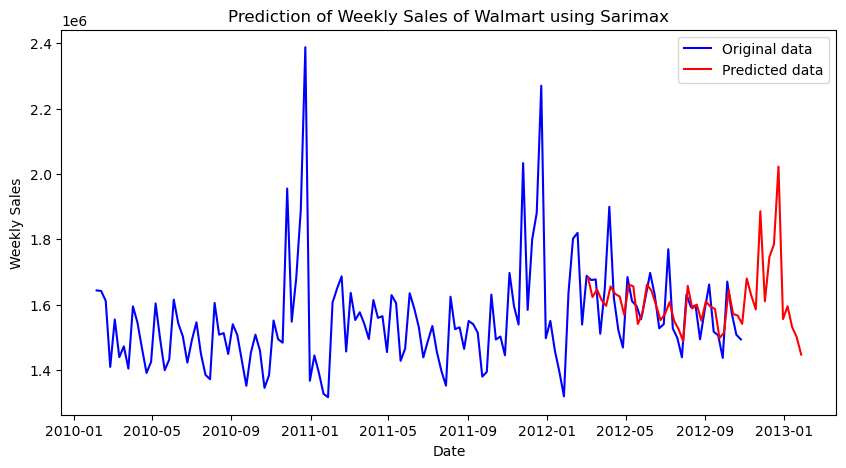

In [73]:
plt.figure(figsize = (10,5))
plt.plot(sf['Weekly_Sales'], label = 'Original data', color = 'b')
plt.plot(forecast['predicted_mean'], label = 'Predicted data', color = 'r')
plt.legend()
plt.title('Prediction of Weekly Sales of Walmart using Sarimax')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [74]:
sf.reset_index(inplace = True)

In [75]:
sf

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


# forcasting using profet model

In [83]:
from prophet import Prophet

In [84]:
# As Per Phrophet excisting columns to rename with ds and y
sf = sf.rename(columns = {'Date' : 'ds' , 'Weekly_Sales' : 'y'})
sf

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [85]:
model = Prophet()
model.fit(sf)

13:48:48 - cmdstanpy - INFO - Chain [1] start processing
13:48:48 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
# If your original dataset ends on a specific date (say, October 1, 2023), the future DataFrame will have 12 additional rows, each representing one week
# generate a DataFrame that contains future dates for which the model will make predictions.
# asking the model to forecast for the next 12 weeks.
future = model.make_future_dataframe(periods=12, freq = 'W')
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
150,2012-12-16
151,2012-12-23
152,2012-12-30
153,2013-01-06


In [88]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.483590e+06,1.436618e+06,1.713350e+06,1.483590e+06,1.483590e+06,92034.937746,92034.937746,92034.937746,92034.937746,92034.937746,92034.937746,0.0,0.0,0.0,1.575625e+06
1,2010-02-12,1.484653e+06,1.498752e+06,1.754968e+06,1.484653e+06,1.484653e+06,145656.847794,145656.847794,145656.847794,145656.847794,145656.847794,145656.847794,0.0,0.0,0.0,1.630310e+06
2,2010-02-19,1.485716e+06,1.453624e+06,1.725924e+06,1.485716e+06,1.485716e+06,102501.631962,102501.631962,102501.631962,102501.631962,102501.631962,102501.631962,0.0,0.0,0.0,1.588217e+06
3,2010-02-26,1.486778e+06,1.392970e+06,1.663009e+06,1.486778e+06,1.486778e+06,35794.483410,35794.483410,35794.483410,35794.483410,35794.483410,35794.483410,0.0,0.0,0.0,1.522573e+06
4,2010-03-05,1.487841e+06,1.348371e+06,1.623021e+06,1.487841e+06,1.487841e+06,650.436524,650.436524,650.436524,650.436524,650.436524,650.436524,0.0,0.0,0.0,1.488491e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2012-12-16,1.647600e+06,1.886418e+06,2.160325e+06,1.647586e+06,1.647611e+06,376911.856864,376911.856864,376911.856864,376911.856864,376911.856864,376911.856864,0.0,0.0,0.0,2.024511e+06
151,2012-12-23,1.648700e+06,1.887130e+06,2.159903e+06,1.648683e+06,1.648714e+06,377383.883137,377383.883137,377383.883137,377383.883137,377383.883137,377383.883137,0.0,0.0,0.0,2.026083e+06
152,2012-12-30,1.649799e+06,1.718067e+06,1.992654e+06,1.649780e+06,1.649816e+06,206430.507755,206430.507755,206430.507755,206430.507755,206430.507755,206430.507755,0.0,0.0,0.0,1.856230e+06
153,2013-01-06,1.650899e+06,1.464156e+06,1.730001e+06,1.650877e+06,1.650919e+06,-60594.841769,-60594.841769,-60594.841769,-60594.841769,-60594.841769,-60594.841769,0.0,0.0,0.0,1.590304e+06


In [ ]:
# ds: The date for which the prediction is made (from the future DataFrame).
# yhat: The predicted value for the target variable (in your case, the predicted Weekly_Sales for each date).
# yhat_lower: The lower bound of the prediction (uncertainty interval).
# yhat_lower: The lower bound of the prediction (uncertainty interval). 
# yhat_upper: The upper bound of the prediction (uncertainty interval).
# yhat_lower and yhat_upper: Represent the lower and upper bounds of the prediction, 
#indicating the range of uncertainty around the forecasted values.

# The uncertainty intervals (the shaded area) help to express how confident the model is about its predictions.


# Summary:
#This code generates predictions for future dates using the fitted Prophet model. 
# The forecast DataFrame includes the predicted sales values (yhat), 
# along with uncertainty intervals (yhat_lower, yhat_upper) for each future date. 
# This output is essential for understanding future sales trends & making data-driven decisions based on the forecasted data.

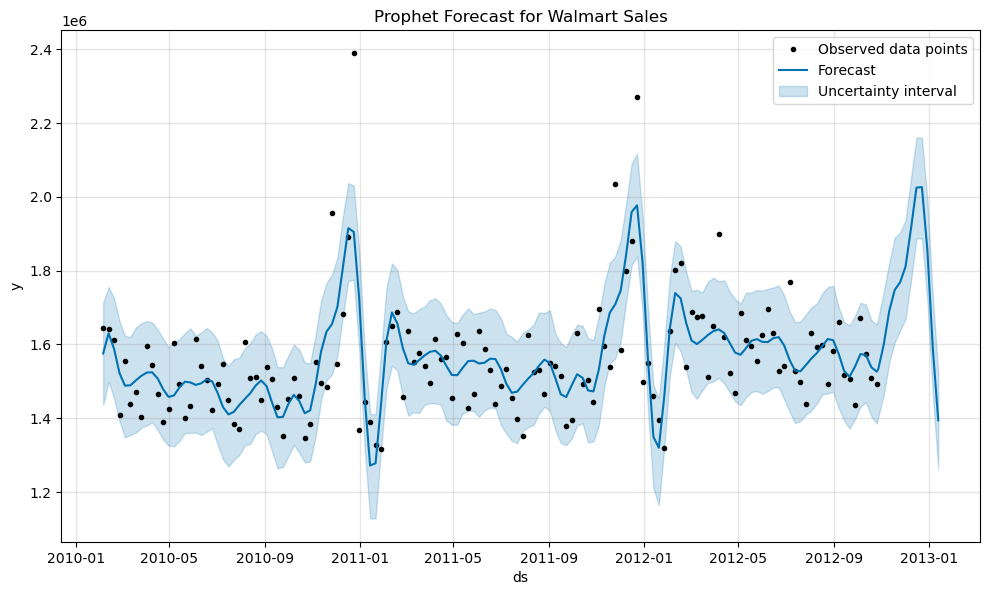

In [91]:
model.plot(forecast)
plt.title('Prophet Forecast for Walmart Sales')
plt.legend()
plt.show()

In [ ]:
#  key insights from the chart:
# 1. The black dots represent the actual weekly sales (y) for Walmart over time.
# 2. The blue line represents the forecasted sales values (yhat) predicted by the Prophet model.
# 3. The model has captured the general trend and seasonality of the sales data, and the forecasted values closely follow the overall pattern of the actual sales.
# 4. The shaded blue region around the forecasted line represents the uncertainty intervals, that mean nhoe confident is model about predictions.
# 5. There are clear seasonal patterns visible in the data. Large peaks can be seen around the same periods each year, likely coinciding with seasonal events (e.g., holidays, Black Friday).
# 6. These peaks occur in late 2010, late 2011, and late 2012, reflecting significant increases in sales during these periods.
# 7. he model does a good job predicting the underlying trend, but the sharp spikes in sales are not fully captured by the forecasted line.
# 8. There is a stable upward trend in Walmart sales across time, but the model also recognizes periods where sales drop and then rise again, indicating a pattern of cyclic behavior.

In [ ]:
# train=sf.iloc[:108]
# test=sf.iloc[108:]



# model2 = Prophet()
# model2.fit(train)
# future = model2.make_future_dataframe(len(test))
# forecast = model2.predict(future)


# actual_values = test['y'].values
# predicted_values = forecast[-len(test):]['yhat'].values

# # Calculate RMSE
# rmse22 = mean_squared_error(actual_values, predicted_values, squared=False)
# print(f"RMSE: {rmse22}")

In [92]:
X = sf.iloc[:108]
y = sf.iloc[108:]

In [93]:
model2 = Prophet()
model2.fit(X)

14:46:03 - cmdstanpy - INFO - Chain [1] start processing
14:46:03 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
future = model2.make_future_dataframe(len(y))
future

,ds
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05
...,...
138,2012-03-26
139,2012-03-27
140,2012-03-28
141,2012-03-29


In [99]:
forecast = model2.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.494527e+06,1.461679e+06,1.752714e+06,1.494527e+06,1.494527e+06,102481.370451,102481.370451,102481.370451,102481.370451,102481.370451,102481.370451,0.0,0.0,0.0,1.597009e+06
1,2010-02-12,1.495386e+06,1.509702e+06,1.803353e+06,1.495386e+06,1.495386e+06,151705.842363,151705.842363,151705.842363,151705.842363,151705.842363,151705.842363,0.0,0.0,0.0,1.647091e+06
2,2010-02-19,1.496244e+06,1.442711e+06,1.729216e+06,1.496244e+06,1.496244e+06,94446.328893,94446.328893,94446.328893,94446.328893,94446.328893,94446.328893,0.0,0.0,0.0,1.590690e+06
3,2010-02-26,1.497102e+06,1.370826e+06,1.657564e+06,1.497102e+06,1.497102e+06,13888.480073,13888.480073,13888.480073,13888.480073,13888.480073,13888.480073,0.0,0.0,0.0,1.510990e+06
4,2010-03-05,1.497960e+06,1.327602e+06,1.617483e+06,1.497960e+06,1.497960e+06,-23970.288369,-23970.288369,-23970.288369,-23970.288369,-23970.288369,-23970.288369,0.0,0.0,0.0,1.473990e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-03-26,1.590160e+06,1.441510e+06,1.732242e+06,1.590160e+06,1.590160e+06,5655.403012,5655.403012,5655.403012,5655.403012,5655.403012,5655.403012,0.0,0.0,0.0,1.595816e+06
139,2012-03-27,1.590283e+06,1.453517e+06,1.738222e+06,1.590283e+06,1.590283e+06,5244.480367,5244.480367,5244.480367,5244.480367,5244.480367,5244.480367,0.0,0.0,0.0,1.595528e+06
140,2012-03-28,1.590406e+06,1.456435e+06,1.734837e+06,1.590406e+06,1.590406e+06,4706.673484,4706.673484,4706.673484,4706.673484,4706.673484,4706.673484,0.0,0.0,0.0,1.595112e+06
141,2012-03-29,1.590528e+06,1.458879e+06,1.737281e+06,1.590528e+06,1.590528e+06,4084.714471,4084.714471,4084.714471,4084.714471,4084.714471,4084.714471,0.0,0.0,0.0,1.594613e+06


In [101]:
actual_values = y['y'].values
predicted_values = forecast[-len(y):]['yhat'].values

In [102]:
actual_values

array([1688420.76, 1675431.16, 1677472.78, 1511068.07, 1649604.63,
       1899676.88, 1621031.7 , 1521577.87, 1468928.37, 1684519.99,
       1611096.05, 1595901.87, 1555444.55, 1624477.58, 1697230.96,
       1630607.  , 1527845.81, 1540421.49, 1769854.16, 1527014.04,
       1497954.76, 1439123.71, 1631135.79, 1592409.97, 1597868.05,
       1494122.38, 1582083.4 , 1661767.33, 1517428.87, 1506126.06,
       1437059.26, 1670785.97, 1573072.81, 1508068.77, 1493659.74])

In [103]:
predicted_values

array([1615377.84286779, 1605265.24495781, 1596093.7910893 ,
       1587966.69924078, 1580954.65650702, 1575096.51313982,
       1570400.72255289, 1566847.45017423, 1564391.26003531,
       1562964.27699123, 1562479.71466703, 1562835.65472293,
       1563918.9618342 , 1565609.2208047 , 1567782.58730493,
       1570315.45159359, 1573087.82492208, 1575986.3707548 ,
       1578907.0170285 , 1581757.10096448, 1584457.01395007,
       1586941.33023451, 1589159.41916143, 1591075.55592723,
       1592668.55999579, 1593931.00293615, 1594868.0382715 ,
       1595495.91467482, 1595840.2403429 , 1595934.0705122 ,
       1595815.89181418, 1595527.57654323, 1595112.37703445,
       1594613.02539563, 1594069.99704068])

In [104]:
# Calculate RMSE
rmse22 = mean_squared_error(actual_values, predicted_values, squared=False)
print(f"RMSE: {rmse22}")

RMSE: 98604.08347348298


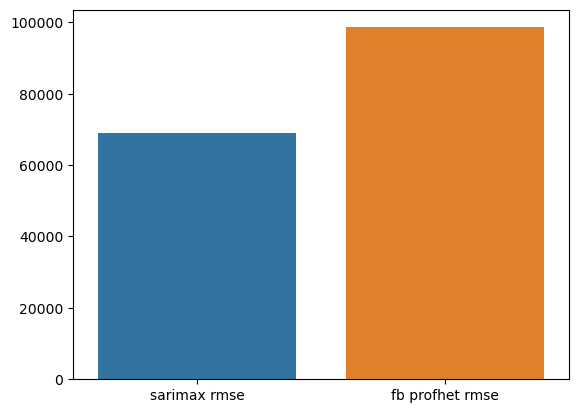

In [108]:
a=['sarimax rmse','fb profhet rmse']
b=[RMSE2,rmse22]
sns.barplot(x=a,y=b)
plt.show()